# Model Training

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
X = df.drop('math_score' , axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
y = df['math_score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [12]:
num_col = [columns for columns in X.columns if X[columns].dtype!='object']
cat_col = [columns for columns in X.columns if (X[columns].dtype=='object') & (columns not in('gender','lunch','test_preparation_course'))]
cat_col

['race_ethnicity', 'parental_level_of_education']

In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder , StandardScaler

transformer = ColumnTransformer(remainder='passthrough',
                                transformers=[
                                    ('trf1' , OrdinalEncoder(categories=[['male','female']]) , ['gender']),
                                    ('trf2' , OrdinalEncoder(categories=[['free/reduced' , 'standard']]) , ['lunch']),
                                    ('trf3' , OrdinalEncoder(categories=[['none' , 'completed']]) , ['test_preparation_course']),
                                    ('trf4' , OneHotEncoder(sparse_output=False , drop='first') , cat_col),
                                    ('trf5' , StandardScaler() , num_col)
                                ])

In [56]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X ,y , test_size=0.2 , random_state=10)
X_train.shape , y_train.shape

((800, 7), (800,))

In [57]:
X_train_trans = transformer.fit_transform(X_train)
X_test_trans = transformer.transform(X_test)

scaler = StandardScaler()
y_train_trans = scaler.fit_transform(y_train.values.reshape(-1,1))
y_test_trans = scaler.transform(y_test.values.reshape(-1,1))
X_train_trans

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -1.17267395, -1.50518701],
       [ 1.        ,  1.        ,  1.        , ...,  0.        ,
         1.03714961,  1.12510921],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.896446  , -0.91337036],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.96550299, -0.84761296],
       [ 1.        ,  1.        ,  0.        , ...,  0.        ,
         1.79677646,  1.19086661],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -1.86324381, -1.76821663]])

In [58]:
y_train_trans

array([[-1.15521898],
       [ 0.21751259],
       [-1.3513235 ],
       [ 1.00193063],
       [-0.04396009],
       [ 0.60972161],
       [-0.76300996],
       [ 0.87119429],
       [ 0.02140808],
       [-0.04396009],
       [ 0.54435344],
       [ 1.85171684],
       [-0.17469643],
       [ 1.45950782],
       [-1.3513235 ],
       [ 1.39413965],
       [ 0.54435344],
       [ 0.93656246],
       [ 0.93656246],
       [ 0.54435344],
       [-0.37080094],
       [-0.10932826],
       [-0.56690545],
       [-0.50153728],
       [-1.48205984],
       [-0.50153728],
       [-0.2400646 ],
       [ 0.02140808],
       [-0.17469643],
       [-0.56690545],
       [-0.2400646 ],
       [ 1.45950782],
       [ 1.0672988 ],
       [ 0.67508978],
       [-0.37080094],
       [ 0.28288076],
       [-0.56690545],
       [-0.30543277],
       [-0.43616911],
       [-2.20110971],
       [ 0.15214442],
       [ 0.08677625],
       [ 0.87119429],
       [ 0.80582612],
       [-0.8937463 ],
       [ 0

In [59]:
transformer.get_feature_names_out()

array(['trf1__gender', 'trf2__lunch', 'trf3__test_preparation_course',
       'trf4__race_ethnicity_group B', 'trf4__race_ethnicity_group C',
       'trf4__race_ethnicity_group D', 'trf4__race_ethnicity_group E',
       "trf4__parental_level_of_education_bachelor's degree",
       'trf4__parental_level_of_education_high school',
       "trf4__parental_level_of_education_master's degree",
       'trf4__parental_level_of_education_some college',
       'trf4__parental_level_of_education_some high school',
       'trf5__reading_score', 'trf5__writing_score'], dtype=object)

In [69]:
X_trans_df = pd.DataFrame(X_train_trans , columns=transformer.get_feature_names_out())
y_trans_df = pd.DataFrame(y_train_trans , columns=['math_score'])

In [70]:
transformed_df = pd.concat([X_trans_df , y_trans_df] , axis=1)
transformed_df.head()

,trf1__gender,trf2__lunch,trf3__test_preparation_course,trf4__race_ethnicity_group B,trf4__race_ethnicity_group C,trf4__race_ethnicity_group D,trf4__race_ethnicity_group E,trf4__parental_level_of_education_bachelor's degree,trf4__parental_level_of_education_high school,trf4__parental_level_of_education_master's degree,trf4__parental_level_of_education_some college,trf4__parental_level_of_education_some high school,trf5__reading_score,trf5__writing_score,math_score
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.172674,-1.505187,-1.155219
1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.037150,1.125109,0.217513
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.896446,-0.913370,-1.351323
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.934890,1.848441,1.001931
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.689275,-0.979128,-0.043960


<Axes: >

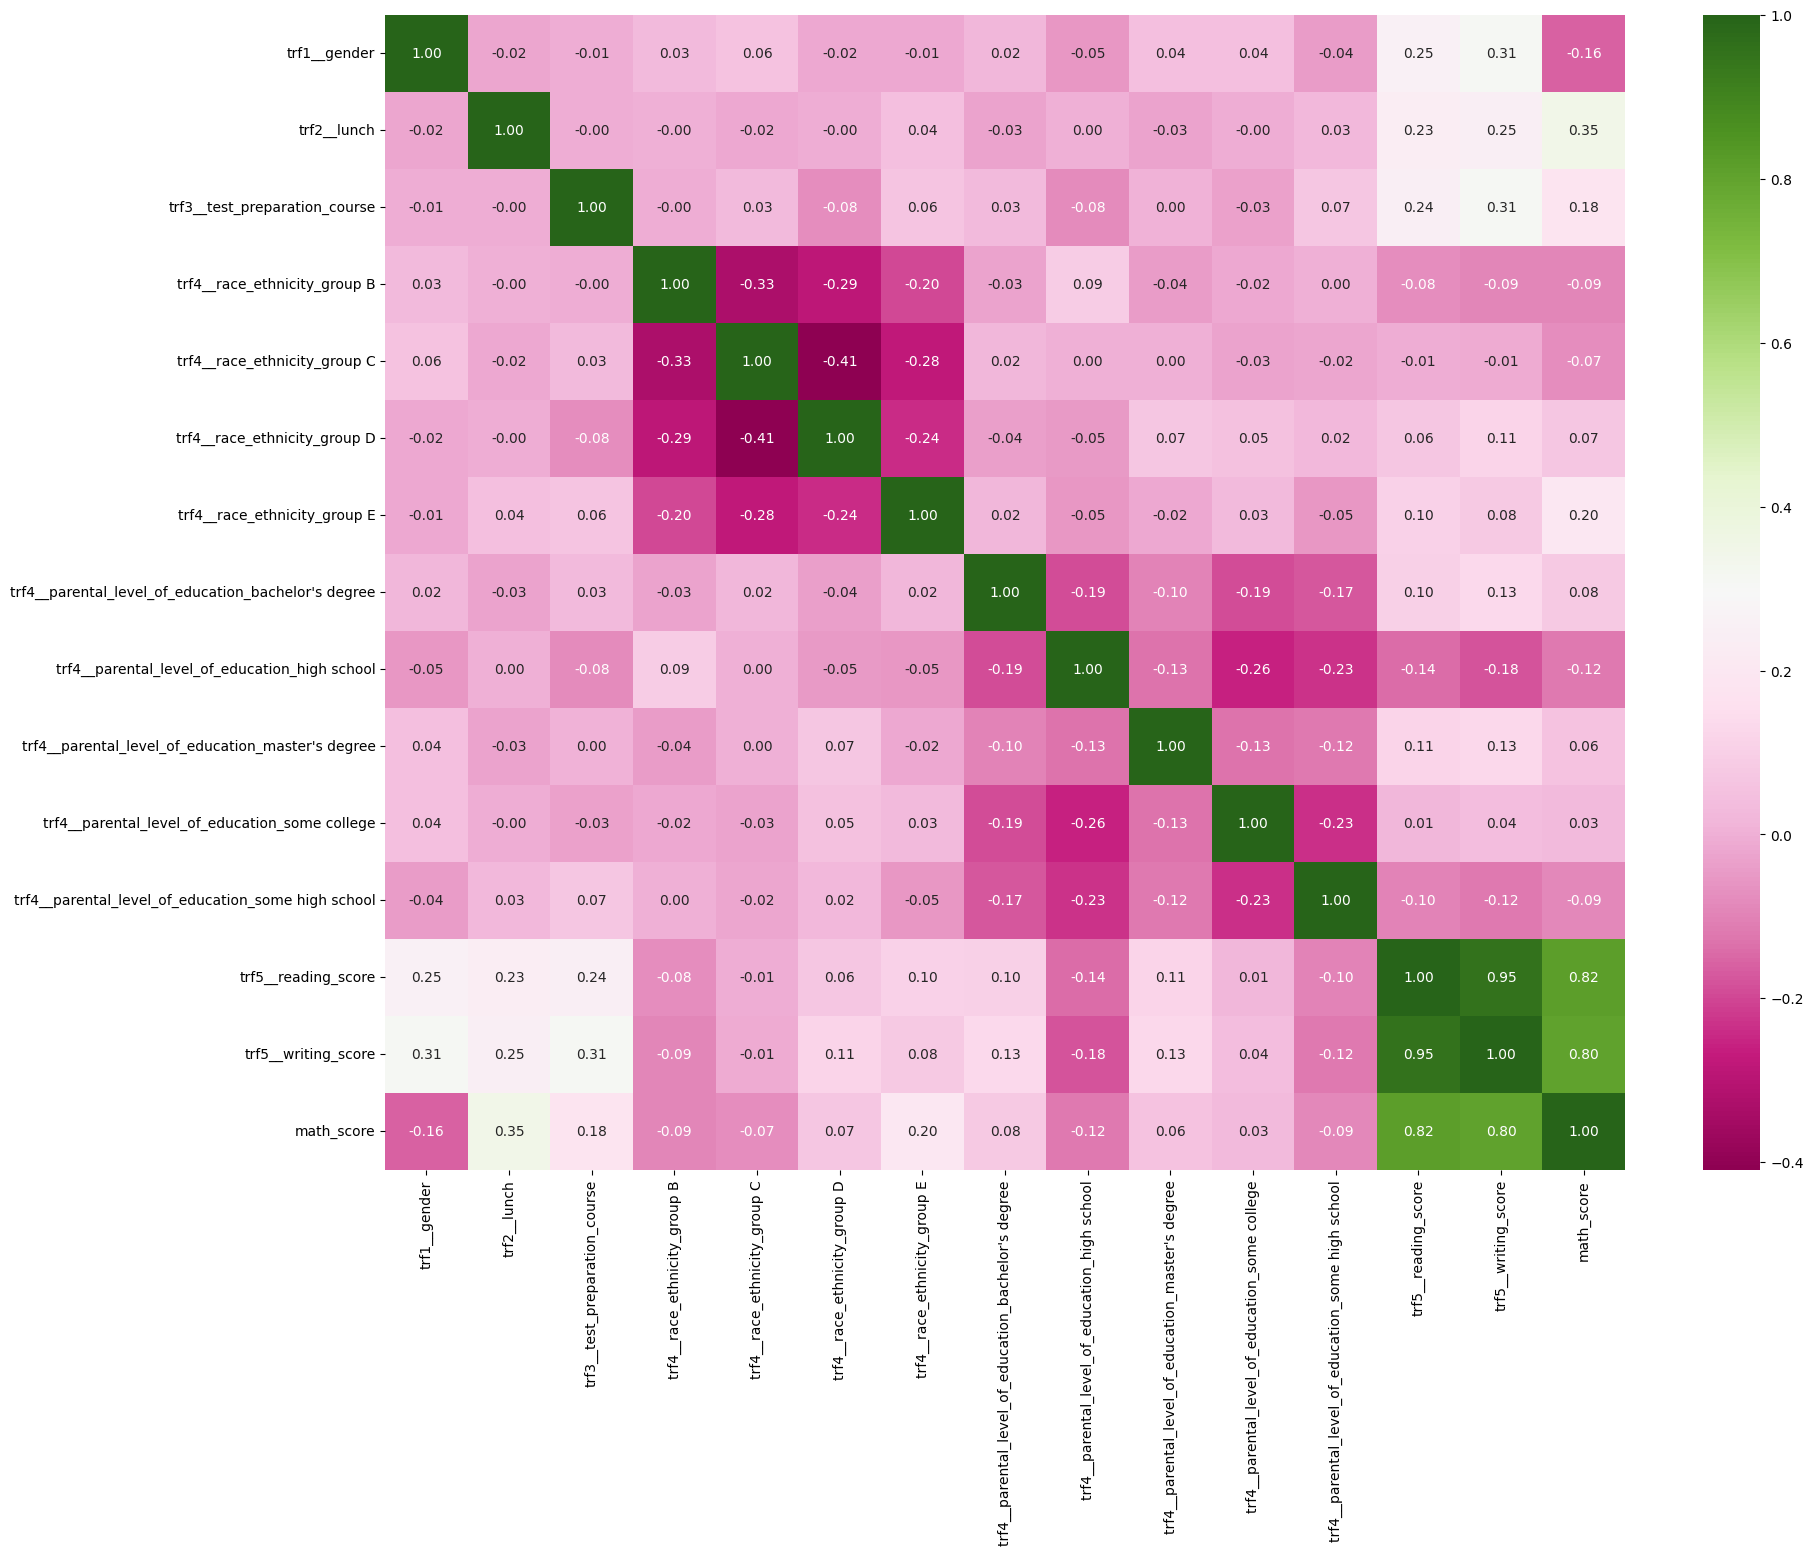

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
sns.heatmap(transformed_df.corr() , annot=True , fmt='.2f' ,  cmap='PiYG')

In [82]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [84]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_trans, y_train_trans) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_trans)
    y_test_pred = model.predict(X_test_trans)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train_trans , y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test_trans , y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.3470
- Mean Absolute Error: 0.2776
- R2 Score: 0.8796
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3547
- Mean Absolute Error: 0.2804
- R2 Score: 0.8590


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.0000
- Mean Absolute Error: 0.7949
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.9545
- Mean Absolute Error: 0.7522
- R2 Score: -0.0208


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.3471
- Mean Absolute Error: 0.2774
- R2 Score: 0.8795
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3538
- Mean Absolute Error: 0.2799
- R2 Score: 0.8597


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.3780
- Mean Absolute Error: 0.3026
- R2 Score: 0.8571
----------------------

c:\Users\Vishwamohan\OneDrive\Desktop\Vishu\Projects\Student_score_pred\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1539
- Mean Absolute Error: 0.1216
- R2 Score: 0.9763
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3766
- Mean Absolute Error: 0.3029
- R2 Score: 0.8411


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.0767
- Mean Absolute Error: 0.0487
- R2 Score: 0.9941
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4228
- Mean Absolute Error: 0.3397
- R2 Score: 0.7997


CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 0.2075
- Mean Absolute Error: 0.1626
- R2 Score: 0.9569
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3665
- Mean Absolute Error: 0.2921
- R2 Score: 0.8495


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 0.3887
- Mean Absolute Error: 0.3155
- R2 Score: 0.84

c:\Users\Vishwamohan\OneDrive\Desktop\Vishu\Projects\Student_score_pred\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [85]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.859710
0,Linear Regression,0.859028
7,CatBoosting Regressor,0.849498
5,Random Forest Regressor,0.841118
8,AdaBoost Regressor,0.824202
6,XGBRegressor,0.799664
3,K-Neighbors Regressor,0.797163
4,Decision Tree,0.703588
1,Lasso,-0.020764


In [87]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train_trans, y_train_trans)
y_pred = lin_model.predict(X_test_trans)
score = r2_score(y_test_trans, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 85.90


Text(0, 0.5, 'Predicted')

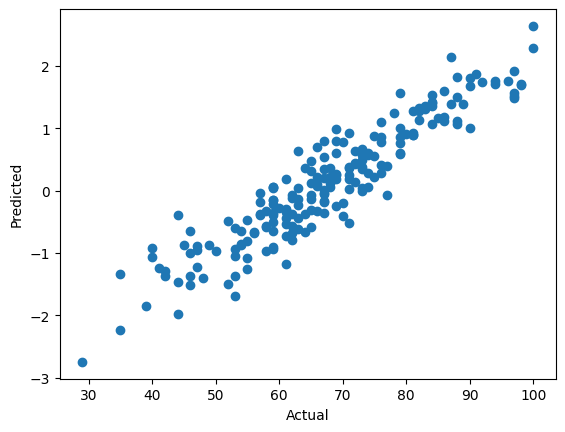

In [88]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

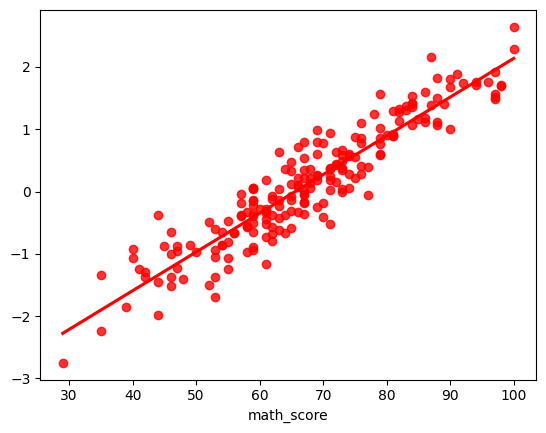

In [89]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [97]:
y_test_trans

array([[-0.10932826],
       [ 1.19803514],
       [-0.10932826],
       [-0.17469643],
       [ 0.21751259],
       [ 0.4136171 ],
       [ 1.65561233],
       [ 0.67508978],
       [-1.67816435],
       [ 0.87119429],
       [ 1.59024416],
       [-0.56690545],
       [ 0.67508978],
       [-0.50153728],
       [ 0.67508978],
       [ 0.54435344],
       [ 1.59024416],
       [ 0.4136171 ],
       [-0.8937463 ],
       [-0.43616911],
       [ 0.87119429],
       [-0.43616911],
       [ 0.34824893],
       [ 0.02140808],
       [ 1.00193063],
       [ 1.45950782],
       [ 1.32877148],
       [ 0.4136171 ],
       [ 1.85171684],
       [ 0.08677625],
       [ 1.39413965],
       [-0.82837813],
       [-1.61279618],
       [ 0.21751259],
       [ 0.15214442],
       [-0.17469643],
       [ 1.13266697],
       [-0.69764179],
       [ 1.45950782],
       [ 0.4136171 ],
       [ 1.39413965],
       [-0.43616911],
       [ 2.11318952],
       [ 0.21751259],
       [ 0.08677625],
       [ 1

In [100]:
print("y_test_trans shape:", y_test_trans.shape)
print("y_pred shape:", y_pred.shape)


y_test_trans shape: (200, 1)
y_pred shape: (200, 1)


In [101]:
pred_df=pd.DataFrame({'Actual Value':y_test_trans,'Predicted Value':y_pred,'Difference':y_test_trans-y_pred})
pred_df

ValueError: Per-column arrays must each be 1-dimensional

In [103]:
# Flatten arrays if necessary
y_test_trans = y_test_trans.ravel()
y_pred = y_pred.ravel()

# Verify lengths
assert len(y_test_trans) == len(y_pred), "Mismatch in lengths of y_test_trans and y_pred"

# Create DataFrame
pred_df = pd.DataFrame({
    'Actual Value': y_test_trans,
    'Predicted Value': y_pred,
    'Difference': y_test_trans - y_pred
})

pred_df

,Actual Value,Predicted Value,Difference
0,-0.109328,-0.369218,0.259890
1,1.198035,1.533686,-0.335651
2,-0.109328,-0.662092,0.552763
3,-0.174696,-0.235412,0.060716
4,0.217513,0.986638,-0.769126
...,...,...,...
195,1.459508,1.072505,0.387003
196,-0.240065,-0.380740,0.140675
197,0.544353,0.055853,0.488501
198,-0.109328,0.367596,-0.476925
